In [ ]:
import numpy as np
import pandas as pd

# **PENGGUNAAN MODEL N-GRAM**

**Penggunaan Model N-gram**

In [ ]:
df1 = pd.read_csv('/content/Data-0.csv')
df2 = pd.read_csv('/content/Data-1.csv')
df3 = pd.read_csv('/content/Data-2.csv')
df4 = pd.read_csv('/content/Data-3.csv')
df5 = pd.read_csv('/content/Data-4.csv')
df6 = pd.read_csv('/content/Data-5.csv')
df7 = pd.read_csv('/content/Data-6.csv')
df8 = pd.read_csv('/content/Data-7.csv')
df9 = pd.read_csv('/content/Data-8.csv')

In [ ]:
gabungan_Df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9], ignore_index=True)

In [ ]:
gabungan_Df.head(10)

,judul,label,isi_berita,url
0,"Jika Presiden 3 Periode, Bamsoet Khawatir Masa...",POLITIK,GELORA.CO - Ketua MPR RI Bambang Soesatyo atau...,https://www.gelora.co/2021/03/jika-presiden-3-...
1,KPI Tegas Tolak Wacana Masa Jabatan Presiden 3...,POLITIK,GELORA.CO - Penolakan atas wacana jabatan pres...,https://www.gelora.co/2021/03/kpi-tegas-tolak-...
2,Obama Ingin Punya Grup Chat dengan Tokoh Dunia...,GLOBAL,GELORA.CO - Mantan Presiden Amerika Serikat (A...,https://www.gelora.co/2021/03/obama-ingin-puny...
3,"Gibran Didukung Jadi Ketum KNPI, Rocky Gerung ...",POLITIK,GELORA.CO - Wali Kota Solo Gibran Rakabuming R...,https://www.gelora.co/2021/03/gibran-didukung-...
4,"Kalau Kalah Lawan AHY, Moeldoko Cs Diperkiraka...",POLITIK,GELORA.CO - Pakar Komunikasi Politik Emrus Sih...,https://www.gelora.co/2021/03/kalau-kalah-lawa...
5,PKS soal Isu Pasal Presiden 3 Periode: Hati-ha...,POLITIK,GELORA.CO - Politikus senior Amien Rais melont...,https://www.gelora.co/2021/03/pks-soal-isu-pas...
6,Eks Wakapolri Syafruddin Bantah Keras Ditawari...,POLITIK,GELORA.CO - Eks Wakapolri Komjen (Purn) Syafru...,https://www.gelora.co/2021/03/eks-wakapolri-sy...
7,"Kasasi Jaksa Ditolak, Fahri Pengancam 'Bunuh J...",HUKUM,GELORA.CO - Mahkamah Agung (MA) menolak kasasi...,https://www.gelora.co/2021/03/kasasi-jaksa-dit...
8,Amien Rais Curiga Wacana 3 Periode Berujung Si...,POLITIK,GELORA.CO - Isu masa jabatan Presiden tiga per...,https://www.gelora.co/2021/03/amien-rais-curig...
9,"Darmizal Bantah Dekati Syafruddin, Demokrat: J...",POLITIK,GELORA.CO - Bantahan dari penggagas perkumpula...,https://www.gelora.co/2021/03/darmizal-bantah-...


In [ ]:
# menghitung berapa banyak label yang ada
jumlahTiapLabel = gabungan_Df['label'].value_counts()

In [ ]:
jumlahTiapLabel

POLITIK          3260
PERISTIWA        1833
HUKUM            1088
NASIONAL          828
GLOBAL            594
EKBIS             258
KESEHATAN         233
KOLOM             177
METRO             129
SELEB             126
HANKAM            112
SOSMED             79
DAERAH             76
KHAZANAH           43
TECHNO             32
SPORT              22
OTOMOTIF           19
HISTORY            16
ENTERTAINMENT       4
PROPERTY            4
FOTO                2
LIFESTYLE           2
MILITER             2
Name: label, dtype: int64

In [ ]:
# lakukan perubahan encoding label dari text ke angka
label_mapping = {label:idx for idx, label in enumerate(gabungan_Df['label'].unique())}
gabungan_Df['label'] = gabungan_Df['label'].map(label_mapping)
gabungan_Df

,judul,label,isi_berita,url
0,"Jika Presiden 3 Periode, Bamsoet Khawatir Masa...",0,GELORA.CO - Ketua MPR RI Bambang Soesatyo atau...,https://www.gelora.co/2021/03/jika-presiden-3-...
1,KPI Tegas Tolak Wacana Masa Jabatan Presiden 3...,0,GELORA.CO - Penolakan atas wacana jabatan pres...,https://www.gelora.co/2021/03/kpi-tegas-tolak-...
2,Obama Ingin Punya Grup Chat dengan Tokoh Dunia...,1,GELORA.CO - Mantan Presiden Amerika Serikat (A...,https://www.gelora.co/2021/03/obama-ingin-puny...
3,"Gibran Didukung Jadi Ketum KNPI, Rocky Gerung ...",0,GELORA.CO - Wali Kota Solo Gibran Rakabuming R...,https://www.gelora.co/2021/03/gibran-didukung-...
4,"Kalau Kalah Lawan AHY, Moeldoko Cs Diperkiraka...",0,GELORA.CO - Pakar Komunikasi Politik Emrus Sih...,https://www.gelora.co/2021/03/kalau-kalah-lawa...
...,...,...,...,...
8995,Pimpinan MPR Fraksi PKS: Ibu Mega Menolak 3 Pe...,0,GELORA.CO - Ternyata tak semua fraksi di MPR R...,https://www.gelora.co/2021/09/pimpinan-mpr-fra...
8996,"Aksi Bocah Cegat Truk Tewaskan 1 Orang, Polres...",3,GELORA.CO - Seorang bocah tewas terlindas saat...,https://www.gelora.co/2021/09/aksi-bocah-cegat...
8997,"Duh! BIN Diduga Disusupi Hacker China, Menyusu...",8,GELORA.CO - Hacker atau peretas China diduga t...,https://www.gelora.co/2021/09/duh-bin-diduga-d...
8998,"Dua Rumah Hancur, Dua Warga Tewas akibat Ledak...",3,GELORA.CO - Ledakan keras mengagetkan warga De...,https://www.gelora.co/2021/09/dua-rumah-hancur...


In [ ]:
jumlahTiapLabel = gabungan_Df['label'].value_counts()
jumlahTiapLabel

0     3260
3     1833
2     1088
6      828
1      594
4      258
5      233
7      177
12     129
11     126
8      112
15      79
10      76
19      61
20      43
14      32
16      22
21      19
13      16
9        4
17       4
18       2
22       2
23       2
Name: label, dtype: int64

In [ ]:
gabungan_Df.isna().sum()

judul         0
label         0
isi_berita    0
url           0
dtype: int64

In [ ]:
gabungan_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   judul       9000 non-null   object
 1   label       9000 non-null   int64 
 2   isi_berita  9000 non-null   object
 3   url         9000 non-null   object
dtypes: int64(1), object(3)
memory usage: 281.4+ KB


In [ ]:
# menghapus karakter khusus
import re
gabungan_Df = gabungan_Df.drop(columns=['url'])
gabungan_Df = gabungan_Df.drop(columns=['isi_berita'])
def hapusKrakterKhusus(text_area):
  return re.sub(r'[^a-zA-Z0-9\s]','',text_area)
gabungan_Df['judul'] = gabungan_Df['judul'].apply(hapusKrakterKhusus)
# gabungan_Df['isi_berita'] = gabungan_Df['isi_berita'].apply(hapusKrakterKhusus)

gabungan_Df.head()

,judul,label
0,Jika Presiden 3 Periode Bamsoet Khawatir Masa ...,0
1,KPI Tegas Tolak Wacana Masa Jabatan Presiden 3...,0
2,Obama Ingin Punya Grup Chat dengan Tokoh Dunia...,1
3,Gibran Didukung Jadi Ketum KNPI Rocky Gerung U...,0
4,Kalau Kalah Lawan AHY Moeldoko Cs Diperkirakan...,0


In [ ]:
# mengubah huruf kecil di label 'judul' dan 'isi_berita'
gabungan_Df['judul'] = gabungan_Df['judul'].str.lower()
# gabungan_Df['isi_berita'] = gabungan_Df['isi_berita'].str.lower()
gabungan_Df.head()

,judul,label
0,jika presiden 3 periode bamsoet khawatir masa ...,0
1,kpi tegas tolak wacana masa jabatan presiden 3...,0
2,obama ingin punya grup chat dengan tokoh dunia...,1
3,gibran didukung jadi ketum knpi rocky gerung u...,0
4,kalau kalah lawan ahy moeldoko cs diperkirakan...,0


In [ ]:
# menghapus kata-kata umum dengan stop words ("dan", "atau","juga")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('indonesian'))

In [ ]:
def removeStopWords(text_area):
  words = text_area.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)
# gabungan_Df['isi_berita'] = gabungan_Df['isi_berita'].apply(removeStopWords)
gabungan_Df['judul'] = gabungan_Df['judul'].apply(removeStopWords)
gabungan_Df.head()

,judul,label
0,presiden 3 periode bamsoet khawatir jabatan pr...,0
1,kpi tolak wacana jabatan presiden 3 periode,0
2,obama grup chat tokoh dunia diinvite,1
3,gibran didukung ketum knpi rocky gerung usulka...,0
4,kalah lawan ahy moeldoko cs bikin partai,0


In [ ]:
# mengubah teks dalam kolom "Judul" dan "Isi Berita" menjadi kata dasar (lemmatization) atau bentuk dasar (stemming),
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
gabungan_Df['judul'] = gabungan_Df['judul'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
# gabungan_Df['isi_berita'] = gabungan_Df['isi_berita'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
gabungan_Df.head()

,judul,label
0,presiden 3 periode bamsoet khawatir jabatan pr...,0
1,kpi tolak wacana jabatan presiden 3 periode,0
2,obama grup chat tokoh dunia diinvite,1
3,gibran didukung ketum knpi rocky gerung usulka...,0
4,kalah lawan ahy moeldoko c bikin partai,0


In [ ]:
# melakukan tokkenisasi
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# gabungan_Df['judul'] = gabungan_Df['judul'].apply(lambda x: word_tokenize(x))
# gabungan_Df['isi_berita'] = gabungan_Df['isi_berita'].apply(lambda x: word_tokenize(x))
# gabungan_Df.head()

In [ ]:
# pembagian data training dan data testing
from sklearn.model_selection import train_test_split

# x = gabungan_Df[['judul','isi_berita']]
x = gabungan_Df['judul']
y = gabungan_Df['label']

X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
print("ukuran data platihan (X_train, y_train) : ", X_train.shape, y_train.shape)
print("ukuran data platihan (X_test, y_test) : ", X_test.shape, y_test.shape)

ukuran data platihan (X_train, y_train) :  (6300,) (6300,)
ukuran data platihan (X_test, y_test) :  (2700,) (2700,)


In [ ]:
# X_train['gabungan'] = X_train.apply(lambda row: row['judul'] + row['isi_berita'], axis=1)
# X_train = X_train.drop(columns=['judul','isi_berita'])
# X_train

In [ ]:
# X_test['gabungan'] = X_test.apply(lambda row: row['judul'] + row['isi_berita'], axis=1)
# X_test = X_test.drop(columns=['judul','isi_berita'])
# X_test

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi objek CountVectorizer untuk N-gram
ngram_vectorizer = CountVectorizer(ngram_range=(1, 4))  # Ubah (1, 2) sesuai dengan N-gram yang Anda inginkan

# Transformasi teks pelatihan menjadi representasi N-gram
X_train_ngram = ngram_vectorizer.fit_transform(X_train)

# Transformasi teks pengujian menjadi representasi N-gram
X_test_ngram = ngram_vectorizer.transform(X_test)



In [ ]:
X_train_ngram

<6300x117143 sparse matrix of type '<class 'numpy.int64'>'
	with 169167 stored elements in Compressed Sparse Row format>

In [ ]:
print("Jumlah baris dalam X_train_ngram:", X_train_ngram.shape[0])
print("Jumlah baris dalam y_train:", len(y_train))

Jumlah baris dalam X_train_ngram: 6300
Jumlah baris dalam y_train: 6300


In [ ]:
#melatih data dengan model naive bayes dari hasil n-gram diatas
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_ngram,y_train)
# clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test_ngram)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi : ", accuracy)
print(classification_report(y_test, y_pred))

Akurasi :  0.6337037037037037
              precision    recall  f1-score   support

           0       0.64      0.93      0.76      1004
           1       0.81      0.57      0.67       154
           2       0.70      0.53      0.61       337
           3       0.60      0.84      0.70       546
           4       0.64      0.08      0.14        90
           5       0.46      0.09      0.15        68
           6       0.44      0.14      0.21       226
           7       1.00      0.02      0.04        49
           8       0.50      0.05      0.10        38
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        26
          11       1.00      0.10      0.18        31
          12       0.00      0.00      0.00        39
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00        22
          16       0.00      0.00      0.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# prediksi
new_text = "Aksi Bocah Cegat Truk Tewaskan 1 Orang"
new_text_ngram = ngram_vectorizer.transform([new_text])
prediksi = clf.predict(new_text_ngram)
print("Hasil prediksi label : ", prediksi[0])

Hasil prediksi label :  3


In [ ]:
X_test.head()

7940    novel baswedan dugaan korupsi bansos rp100 t k...
1162    tengku sentil budiman sok menyingkirkan agama ...
582         sidang te swab digelar habib rizieq pn jaktim
4081    azis syamsuddin ditahan kpk rocky gerung perma...
8412    ancam turun jalan bem si gasak ultimatum jokow...
Name: judul, dtype: object

In [ ]:
#simpan model
import joblib
fileName = "model_prediksi_label_judul_artikel"
joblib.dump(clf, fileName)

['model_prediksi_label_judul_artikel']

# **PENGGUNAAN MODEL HIDDEN MARKOV MODELS(HMMs)**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Data_Tanaman_Padi_Sumatera_version_1.csv')
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [ ]:
df.isna().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
X = df[['Curah hujan', 'Kelembapan']].values
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
df['kategori'] = kmeans.labels_

In [ ]:
df

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,kategori
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06,2
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92,2
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27,2
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08,2
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31,2
...,...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45,0
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36,2
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50,2
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23,2


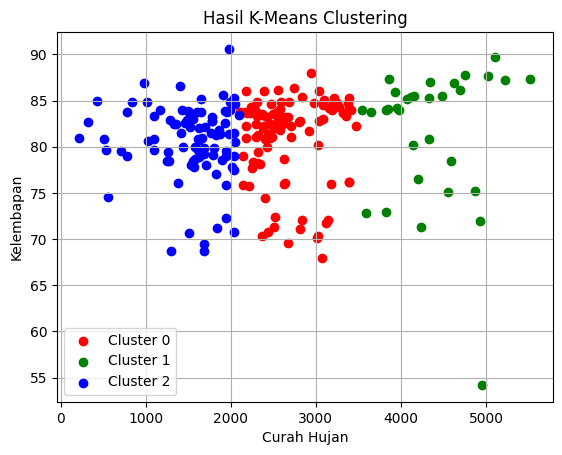

In [ ]:
colors = ['r', 'g', 'b']
for i in range(n_clusters):
    cluster_data = df[df['kategori'] == i]
    plt.scatter(cluster_data['Curah hujan'], cluster_data['Kelembapan'], c=colors[i], label=f'Cluster {i}')

plt.xlabel('Curah Hujan')
plt.ylabel('Kelembapan')
plt.legend()
plt.title('Hasil K-Means Clustering')
plt.grid()
plt.show()

In [ ]:
!pip install hmmlearn

In [ ]:
# import numpy as np
from hmmlearn import hmm
# import pandas as pd

# Baca dataset
data_a = df  # Gantilah 'dataset_padi_sumatra.csv' dengan nama file dataset Anda
# Preprocessing data
# Pastikan Anda telah melakukan langkah-langkah preprocessing sebelumnya seperti yang telah dibahas sebelumnya.

# Misalnya, Anda telah mengonversi data waktu ke indeks DataFrame
data_a['Tahun'] = pd.to_datetime(data_a['Tahun'], format='%Y')
data_a.set_index('Tahun', inplace=True)

# Definisikan state (keadaan)
n_states = 3  # Misalnya, Anda memiliki 3 state seperti yang dibahas sebelumnya (Kering, Normal, Basah)

# Inisialisasi model HMM
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)

# Proses data untuk pelatihan model
X = data_a[['Curah hujan', 'Kelembapan']].values  # Gunakan fitur curah hujan dan kelembapan sebagai observasi
lengths = [len(data_a)]  # Panjang observasi, dalam hal ini, panjang seluruh dataset

# Latih model HMM
model.fit(X, lengths)


GaussianHMM(covariance_type='full', n_components=3, n_iter=100)

In [ ]:
observasi_2024 = np.array([[1385.8, 76.05]])
# observasi_2024 = [[2341.0, 73.00]]
predicted_states = model.predict(observasi_2024)

In [ ]:
predicted_states

array([0])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
data_a

,Provinsi,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,kategori
Tahun,,,,,,,
1993-01-01,Aceh,1329536.00,323589.00,1627.0,82.00,26.06,2
1994-01-01,Aceh,1299699.00,329041.00,1521.0,82.12,26.92,2
1995-01-01,Aceh,1382905.00,339253.00,1476.0,82.72,26.27,2
1996-01-01,Aceh,1419128.00,348223.00,1557.0,83.00,26.08,2
1997-01-01,Aceh,1368074.00,337561.00,1339.0,82.46,26.31,2
...,...,...,...,...,...,...,...
2016-01-01,Lampung,3831923.00,390799.00,2317.6,79.40,26.45,0
2017-01-01,Lampung,4090654.00,396559.00,1825.1,77.04,26.36,2
2018-01-01,Lampung,2488641.91,511940.93,1385.8,76.05,25.50,2


In [ ]:
X = data_a[['Curah hujan','Kelembapan']].values
y = data_a['kategori'].values
X_train, X_test, states_train, states_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_states = 3  # Misalnya, 3 state (kering, normal, basah)
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)
model.fit(X_train)
predicted_states = model.predict(X_test)
mae = mean_absolute_error(states_test, predicted_states)
rmse = np.sqrt(mean_squared_error(states_test, predicted_states))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.1333333333333333
Root Mean Squared Error (RMSE): 1.4681810363696826


In [ ]:
len(predicted_states)

45

In [ ]:
len(X_test)

45

In [ ]:
predicted_states

array([2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0,
       1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       0])

In [ ]:
X_test

array([[1296.8 ,   68.75],
       [2738.4 ,   86.37],
       [2383.8 ,   83.47],
       [1558.3 ,   78.47],
       [1385.8 ,   76.05],
       [1824.  ,   81.25],
       [1533.6 ,   78.  ],
       [2628.  ,   76.  ],
       [3076.  ,   67.98],
       [3822.  ,   84.  ],
       [1648.3 ,   83.76],
       [1270.4 ,   78.5 ],
       [1934.9 ,   82.61],
       [1427.8 ,   83.98],
       [2917.1 ,   81.68],
       [1903.3 ,   78.55],
       [3931.  ,   85.96],
       [4757.5 ,   87.73],
       [1612.8 ,   79.6 ],
       [ 537.6 ,   79.6 ],
       [3123.8 ,   71.73],
       [1268.  ,   79.4 ],
       [4205.2 ,   76.49],
       [1800.  ,   79.89],
       [2632.5 ,   83.26],
       [2614.  ,   82.45],
       [3949.8 ,   84.2 ],
       [4584.2 ,   78.5 ],
       [2945.1 ,   87.97],
       [3390.  ,   76.2 ],
       [1789.  ,   79.1 ],
       [ 776.  ,   79.  ],
       [1577.  ,   78.7 ],
       [2668.9 ,   83.2 ],
       [2389.  ,   82.3 ],
       [2290.1 ,   83.96],
       [3083.  ,   83.  ],
 

# **Penggunaan Model n-gram dan model HMMs secara bersamaan**